In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('flight.csv')

An airline wants to further examine the value of each airline's customers. Following are some of the features of the customer dataset along with their descriptions.

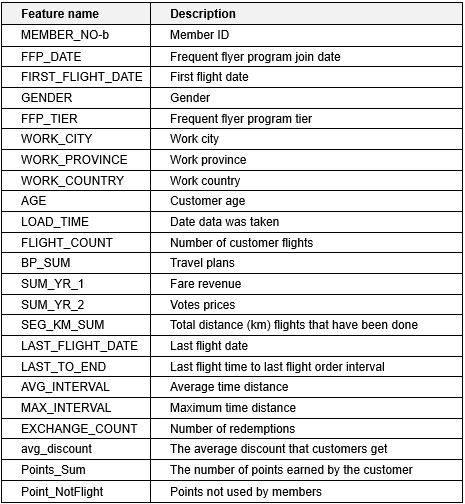

#EDA

In [ ]:
df

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,18375,5/20/2011,6/5/2013,Female,4,guangzhou,guangdong,CN,25.0,3/31/2014,...,0.0,1134,6/9/2013,297,4.000000,4,1,0.000000,12318,22
62984,36041,3/8/2010,9/14/2013,Male,4,foshan,guangdong,CN,38.0,3/31/2014,...,0.0,8016,1/3/2014,89,37.000000,60,14,0.000000,106972,43
62985,45690,3/30/2006,12/2/2006,Female,4,guangzhou,guangdong,CN,43.0,3/31/2014,...,0.0,2594,3/3/2014,29,166.000000,166,0,0.000000,0,0
62986,61027,2/6/2013,2/14/2013,Female,4,guangzhou,guangdong,CN,36.0,3/31/2014,...,0.0,3934,2/26/2013,400,12.000000,12,0,0.000000,0,0


##Handling Duplicated Values

Check for duplicate data.

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.duplicated(subset='MEMBER_NO').sum()

0

No duplicate data was found in the dataset.

##Handling Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In the 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', and 'LAST_FLIGHT_DATE' columns which are in the form of dates, the data type will be changed to DateTime.

Before changing the data type, it was found that there were 421 data on the 'LAST_FLIGHT_DATE' column 'LAST_FLIGHT_DATE'. I assumed that the data came from an incorrect input, so I changed the date 29-02-2014 to 28-02-2014 in the data.

In [ ]:
df[df['LAST_FLIGHT_DATE'].str.contains('2014/2/29')]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
248,56497,6/17/2007,6/17/2007,Female,6,guangzhou,guangdong,CN,46.0,3/31/2014,...,70845.0,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,17306,8/26/2009,4/29/2010,Male,5,haerbin,heilongjiang,CN,70.0,3/31/2014,...,46323.0,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,915,11/10/2006,1/26/2007,Male,5,.,beijing,CN,39.0,3/31/2014,...,30580.0,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,20336,7/13/2005,8/6/2005,Male,5,guangzhou,guangdong,CN,40.0,3/31/2014,...,36417.0,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,62884,5/24/2006,4/21/2007,Male,5,wuhan,hubei,CN,50.0,3/31/2014,...,35680.0,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,55995,1/11/2013,7/10/2013,Male,4,dalianshi,liaoning,CN,23.0,3/31/2014,...,955.0,3513,2014/2/29 0:00:00,32,117.000000,211,0,0.276667,0,0
61871,48742,7/26/2009,7/26/2009,Male,4,tianjin,tianjin,CN,37.0,3/31/2014,...,966.0,1298,2014/2/29 0:00:00,32,135.000000,135,0,0.690000,1094,1
61909,9190,4/11/2011,4/20/2011,Male,4,guangzhou,guangdong,CN,34.0,3/31/2014,...,853.0,2595,2014/2/29 0:00:00,32,1.000000,1,0,0.340000,3356,19
62721,38776,10/31/2007,3/13/2008,Male,4,foshan,guangdong,CN,42.0,3/31/2014,...,688.0,1199,2014/2/29 0:00:00,32,78.000000,78,0,0.489525,276,0


In [ ]:
df.loc[df['LAST_FLIGHT_DATE'].str.contains('2014/2/29'),['LAST_FLIGHT_DATE']] = '2014/2/28'

In [ ]:
columns = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME','LAST_FLIGHT_DATE']
for column in columns:
  df[column] = pd.to_datetime(df[column])

We'll look at the total missing values in each column as follows.

In [ ]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [ ]:
dmv = pd.DataFrame(df.isna().sum())
dmv['Percentage']=dmv[0]/len(df)*100
dmv

,0,Percentage
MEMBER_NO,0,0.000000
FFP_DATE,0,0.000000
FIRST_FLIGHT_DATE,0,0.000000
GENDER,3,0.004763
FFP_TIER,0,0.000000
WORK_CITY,2269,3.602273
WORK_PROVINCE,3248,5.156538
WORK_COUNTRY,26,0.041278
AGE,420,0.666794
LOAD_TIME,0,0.000000


Since the total missing values in the 'GENDER', 'WORK COUNTRY', 'AGE', 'SUM_YR_1', and 'SUM_YR_2' columns are less than 1%, the rows with missing values will be deleted.

In [ ]:
missing_col = ['GENDER','WORK_COUNTRY','AGE','SUM_YR_1','SUM_YR_2']
for col in missing_col:
  df.dropna(subset=[col], inplace=True)

Imputation of missing values in the 'WORK_CITY' and 'WORK_PROVINCE' columns using mode.

In [ ]:
df['WORK_CITY'] = df['WORK_CITY'].fillna(df['WORK_CITY'].mode()[0])
df['WORK_PROVINCE'] = df['WORK_PROVINCE'].fillna(df['WORK_PROVINCE'].mode()[0])

In [ ]:
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

Separate numeric and categorical data.

In [ ]:
df['FFP_TIER'] = df['FFP_TIER'].astype(object)
numerical = df.loc[:, (df.dtypes == int) | (df.dtypes == float)].columns.tolist()
categorical = df.loc[:, df.dtypes == object ].columns.tolist()

Next, I will check the descriptive statistics of each column to see if there is noise or anomaly in the dataset.

In [ ]:
df[numerical].describe()

,MEMBER_NO,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000
mean,31489.315943,42.491108,11.964401,11041.484739,5374.941563,5662.081399,17303.810027,172.606942,68.154935,167.461556,0.324188,0.721649,12681.680953,2.759425
std,18192.014120,9.887556,14.116064,16394.475910,8123.952605,8702.731851,21040.271177,181.234370,77.684101,123.155015,1.143987,0.184792,20597.492952,7.406240
min,2.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15714.750000,35.000000,3.000000,2591.000000,1020.000000,833.000000,4866.750000,29.000000,23.750000,81.000000,0.000000,0.612650,2847.750000,0.000000
50%,31486.500000,41.000000,7.000000,5800.500000,2816.000000,2826.500000,10183.000000,105.000000,45.000000,144.000000,0.000000,0.711827,6442.000000,0.000000
75%,47259.250000,48.000000,15.000000,12975.250000,6600.000000,6912.000000,21497.500000,260.000000,82.500000,229.000000,0.000000,0.808825,14457.250000,1.000000
max,62988.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000


In [ ]:
df[df['AGE']>100]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
23268,20264,2005-04-14,2005-05-18,Female,4,shenzhenshi,guangdong,CN,110.0,2014-03-31,...,2888.0,14053,2013-04-06,361,50.333333,214,1,0.740881,11194,3


From the table above, it can be seen that there is 1 member with an age of more than 100. I assume this data is an anomaly so I drop it from the dataset.

In [ ]:
df.drop(df[df['AGE'] > 100].index, inplace = True)

Furthermore, based on the description of each column, there are several columns that are odd if the value is 0 because based on the minimum value of the 'SEG_KM_SUM' column it indicates that all members have traveled a distance of at least 368 km. The columns are 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'AVG_INTERVAL', 'MAX_INTERVAL', 'Points_Sum'.

In [ ]:
columns_with_zeros = ['BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'AVG_INTERVAL', 'MAX_INTERVAL', 'Points_Sum']

In [ ]:
for i in columns_with_zeros:
  df_b=df[df[i]==0]
  print(i, len(df_b)/len(df)*100)

BP_SUM 0.8471425107105327
SUM_YR_1 15.61878587018026
SUM_YR_2 18.05997898310565
AVG_INTERVAL 0.6385902513943901
MAX_INTERVAL 0.6385902513943901
Points_Sum 0.6272734621291731


Because data with a value of 0 in the 'BP_SUM', 'AVG_INTERVAL', 'MAX_INTERVAL', and 'Points_Sum' columns is less than 1% of the total dataset, the data will be dropped.

In [ ]:
columns_with_zeros_to_drop = ['BP_SUM', 'AVG_INTERVAL', 'MAX_INTERVAL', 'Points_Sum']
for column in columns_with_zeros_to_drop:
  df.drop(df[df[column] == 0].index, inplace = True)

For the columns 'SUM_YR_1' and 'SUM_YR_2', the value 0 will be imputed using the MICE method.

In [ ]:
columns_to_imp = ['SUM_YR_1', 'SUM_YR_2']
for i in columns_to_imp:
  df[i]=df[i].replace(0, np.nan)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=100, max_iter=10)
df[columns_to_imp] = imputer.fit_transform(df[columns_to_imp])

In [ ]:
df[categorical].describe()

,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,60944,60944,60944,60944,60944
unique,2,3,3162,1142,116
top,Male,4,guangzhou,guangdong,CN
freq,46720,56048,11321,20168,55870


Next, data visualization will be carried out to obtain information from the data.

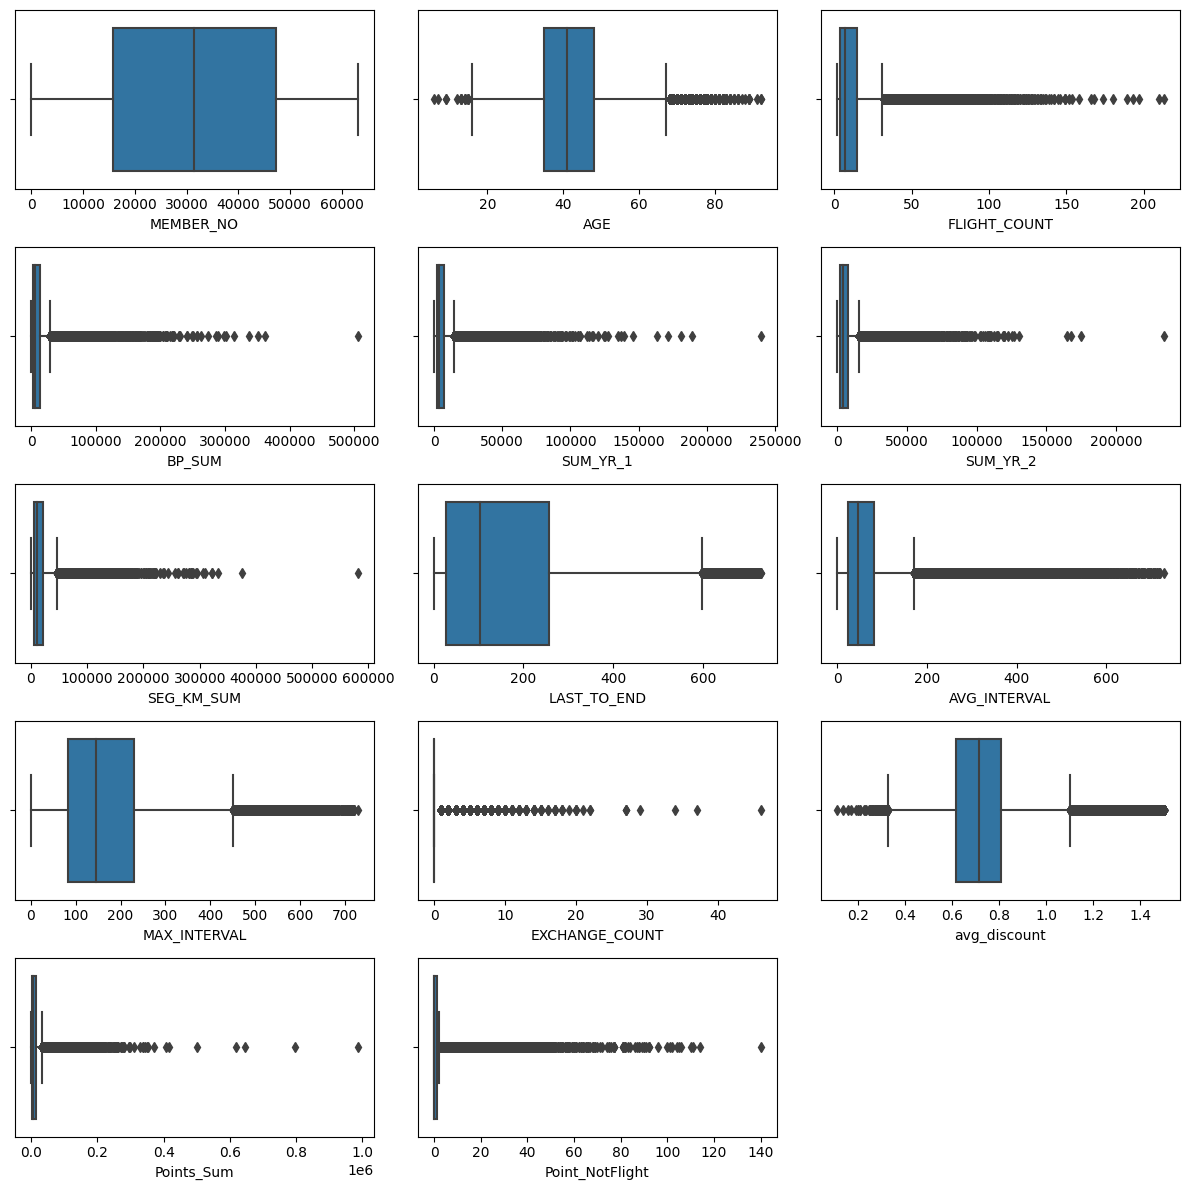

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, len(numerical)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[numerical[i]])
    plt.tight_layout()

plt.show()

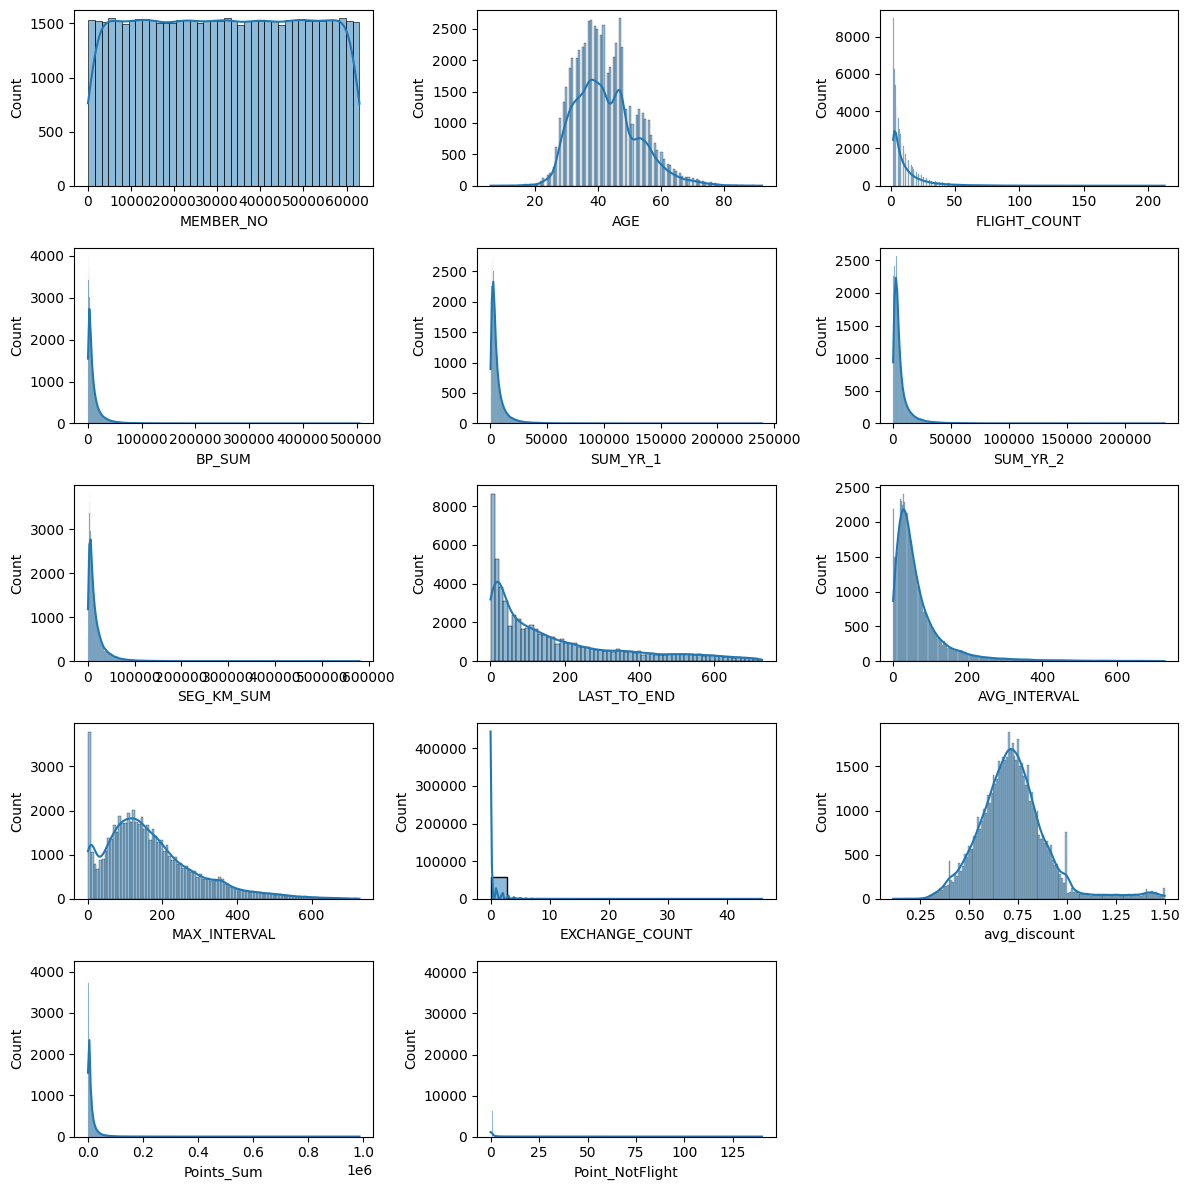

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, len(numerical)):
    plt.subplot(5, 3, i+1)
    sns.histplot(x=df[numerical[i]],kde=True)
    plt.tight_layout()

plt.show()

<Axes: >

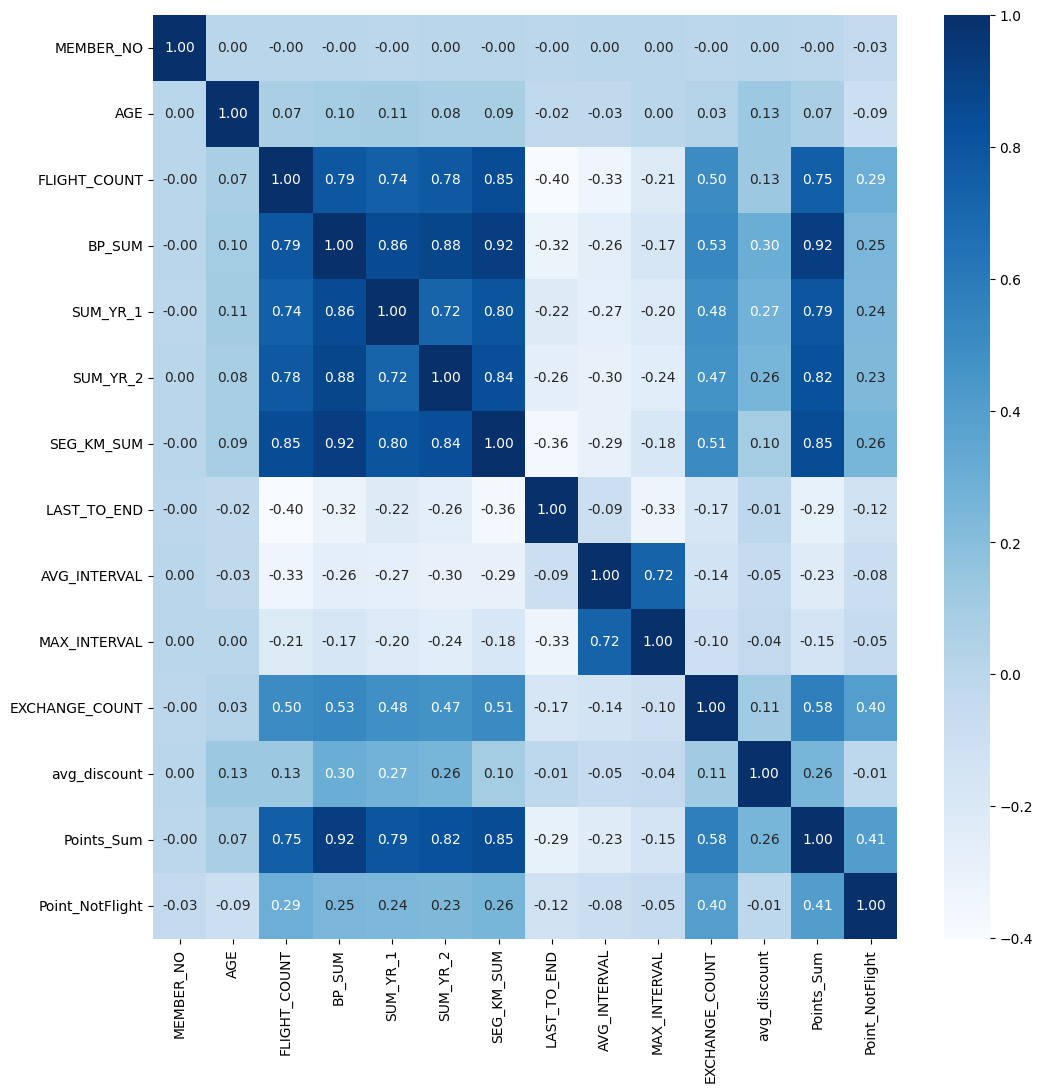

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df[numerical].corr(), cmap='Blues', annot=True, fmt='.2f')

From the graph above, it can be seen that the 'BP_SUM' column and the 'SEG_KM_SUM' column are strongly correlated with each other, as well as between the 'BP_SUM' column and 'Points_Sum' column.

Text(0.5, 0, 'BP_SUM')

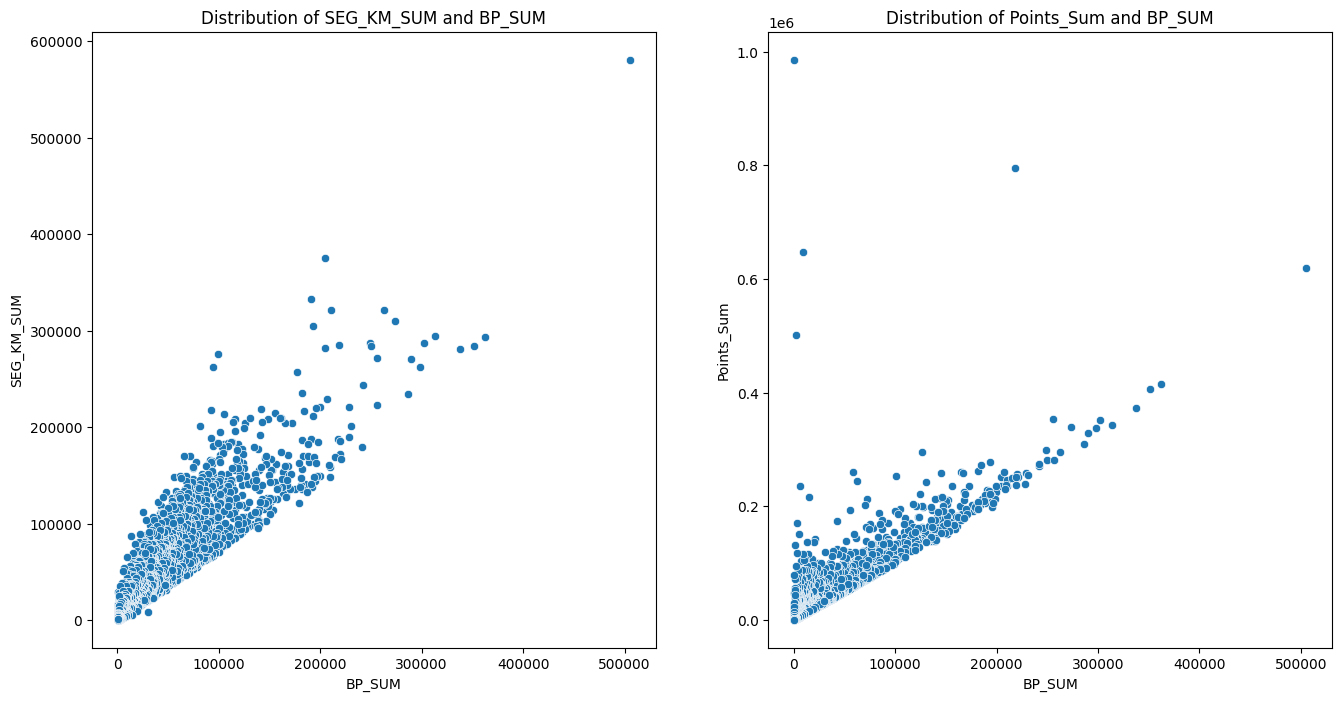

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
sns.scatterplot(x = 'BP_SUM', y = 'SEG_KM_SUM',  data=df,ax=ax1)
ax1.title.set_text("Distribution of SEG_KM_SUM and BP_SUM")
plt.ylabel("SEG_KM_SUM")
plt.xlabel("BP_SUM")

sns.scatterplot(x = 'BP_SUM', y = 'Points_Sum',  data=df,ax=ax2)
ax2.title.set_text("Distribution of Points_Sum and BP_SUM")
plt.ylabel("Points_Sum")
plt.xlabel("BP_SUM")

From the gender column, it can be seen that the majority of members are male.

<Axes: xlabel='GENDER', ylabel='count'>

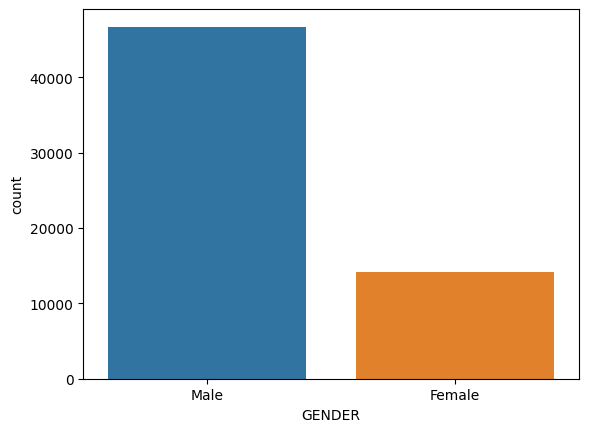

In [ ]:
sns.countplot(x='GENDER',data=df)

#Feature Engineering

##Feature Extraction

I will do member segmentation based on each member's RFM value. From the member segmentation obtained, it is hoped that an appropriate marketing strategy can be formulated to approach and retain each type of member.

The calculation of the recency, frequency, and monetary values for each member is taken from the columns in the dataset that will be used as features for clustering, the columns are as follows:


*   recency: 'LAST_TO_END'
(Distance between the last flight and the last flight booked)
*   frequency: 'FLIGHT_COUNT'
(Number of customer flights)
*   monetary: 'SUM_YR_1'
(Fare revenue)



In [ ]:
rfm = df[['MEMBER_NO','LAST_TO_END','FLIGHT_COUNT','SUM_YR_1']]
rfm = rfm.set_index(['MEMBER_NO'])
rfm.columns = ['recency', 'frequency', 'monetary']
rfm.describe()

,recency,frequency,monetary
count,60944.000000,60944.000000,60944.000000
mean,170.412838,12.110856,6123.618151
std,179.622692,14.169894,7956.250917
min,1.000000,2.000000,108.000000
25%,28.000000,4.000000,2047.850201
50%,104.000000,7.000000,3654.263965
75%,256.000000,15.000000,7092.271230
max,729.000000,213.000000,239560.000000


After the RFM value for each member is obtained, segment formation (clustering) will be carried out on the member with the RFM value as its characteristic.

## Handling Outliers

Before clustering, it is necessary to handle outliers in the dataset first. I will use the IQR method to filter out the outliers.

In [ ]:
print(f'The number of rows before filtering outliers is {rfm.shape[0]}')

skewed_cols = ['recency', 'frequency', 'monetary']
for col in skewed_cols:
    Q1 = rfm[col].quantile(0.25)
    Q3 = rfm[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    rfm = rfm[(rfm[col] >= lower_bound) & (rfm[col] <= upper_bound)]

print(f'The number of rows after filtering outliers is {rfm.shape[0]}')

The number of rows before filtering outliers is 60944
The number of rows after filtering outliers is 50594


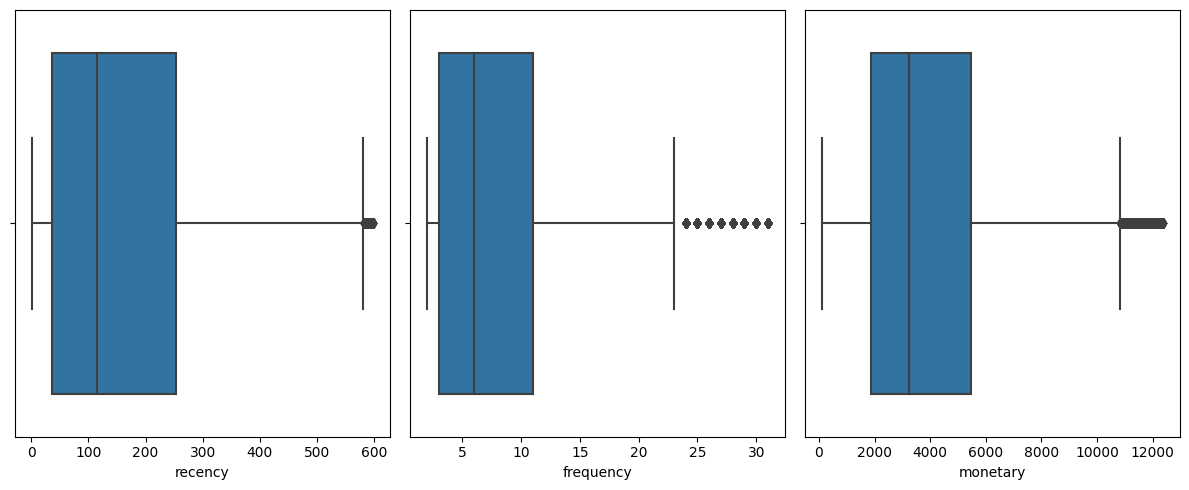

In [ ]:
plt.figure(figsize=(12, 5))
a=rfm.columns
for i in range(0, 3):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=rfm[a[i]])
    plt.tight_layout()

plt.show()

##Multicollinearity Test

In [ ]:
df_temp = rfm.corr()

feature =[]
collinear=[]

for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .85 and df_temp[col][i] < 1) or (df_temp[col][i]< -.85 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                print(Fore.RED + f'\033[1mmulticolinearity alert\033[0m between {col} - {i}')
        else:
            print(f'For {col} and {i}, there is \033[1mNO multicollinearity problem\033[0m')

unique_list = list(set(feature+collinear))


print('\033[1mThe total number of strong corelated features:\033[0m', len(unique_list))

For recency and recency, there is NO multicollinearity problem
For recency and frequency, there is NO multicollinearity problem
For recency and monetary, there is NO multicollinearity problem
For frequency and recency, there is NO multicollinearity problem
For frequency and frequency, there is NO multicollinearity problem
For frequency and monetary, there is NO multicollinearity problem
For monetary and recency, there is NO multicollinearity problem
For monetary and frequency, there is NO multicollinearity problem
For monetary and monetary, there is NO multicollinearity problem
The total number of strong corelated features: 0


##Standardization

Next, I will standardize the RFM data distribution.

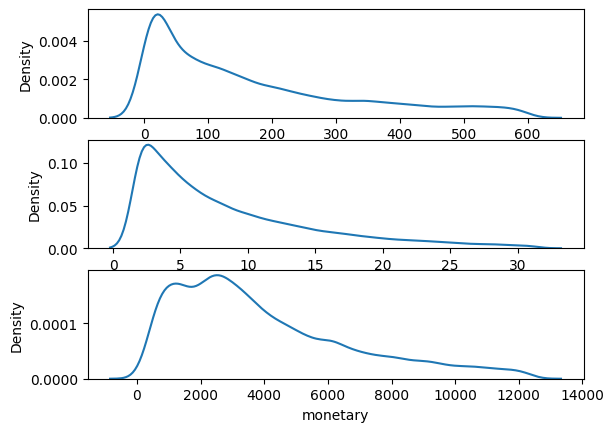

In [ ]:
plt.subplot(3, 1, 1); sns.kdeplot(rfm['recency'])
plt.subplot(3, 1, 2); sns.kdeplot(rfm['frequency'])
plt.subplot(3, 1, 3); sns.kdeplot(rfm['monetary'])
plt.show()

In [ ]:
scaler=StandardScaler()
rfm_std=pd.DataFrame(scaler.fit_transform(rfm),columns=['recency', 'frequency', 'monetary'])

In [ ]:
rfm_std

,recency,frequency,monetary
0,-0.908418,1.490677,1.260943
1,-0.965309,2.263577,3.027196
2,-1.015879,0.717778,2.564218
3,-0.971630,1.026938,-1.049969
4,-0.946345,0.717778,1.624530
...,...,...,...
50589,1.588474,-0.982600,-1.129481
50590,1.550547,-0.982600,-1.129481
50591,-0.491216,-0.982600,-0.589983
50592,-0.288936,-0.982600,-0.602188


#Modeling + Evaluation

##Elbow Method

I will use the elbow method to determine the number of clusters I will build.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

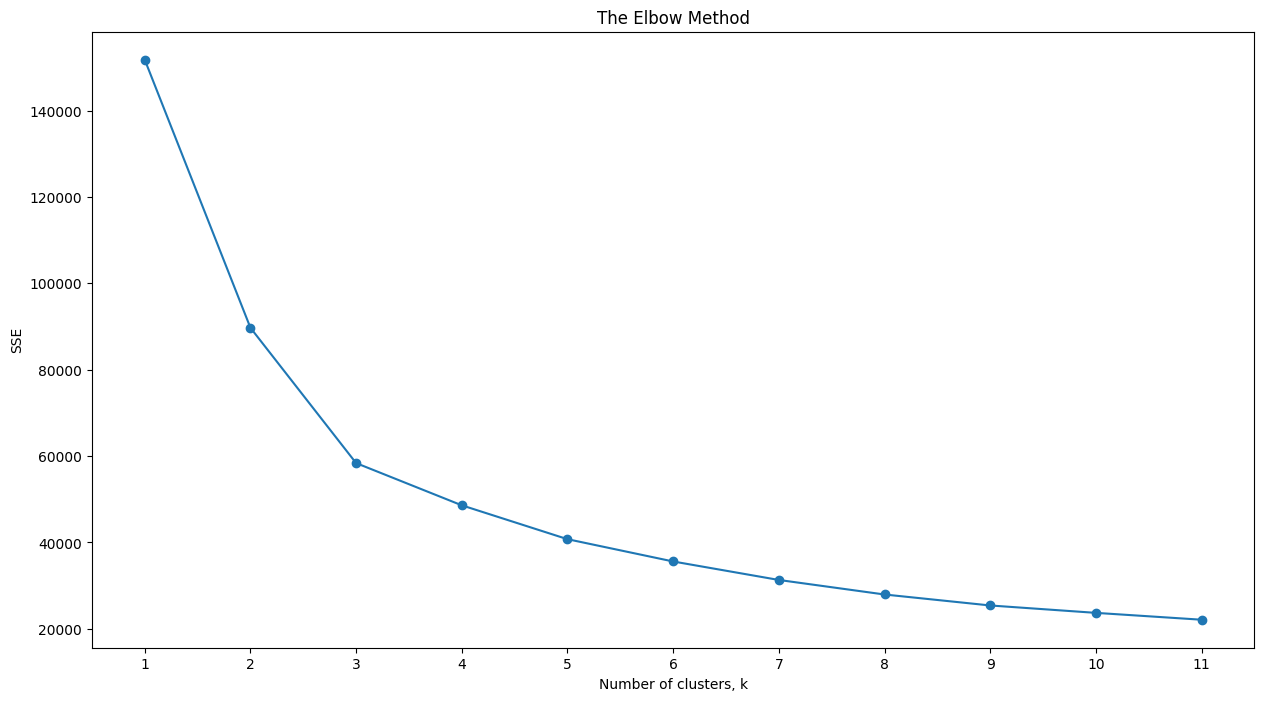

In [ ]:
#First : Get the Best KMeans
ks = range(1, 12)
SSE=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k, random_state=42)
    kc.fit(rfm_std)
    SSE.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, SSE, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('SSE')
plt.title('The Elbow Method')
plt.xticks(ks)
plt.style.use('ggplot')
plt.show()

Based on the Elbow Method, the number of clusters that I will create is 3.

##KMeans Clustering

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(rfm_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusters = kmeans.labels_+1

In [ ]:
rfm_std['Cluster_ID'] = clusters

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(rfm_std)
pcs = pca.transform(rfm_std)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca.head()

,PC 1,PC 2
0,1.993843,0.792076
1,3.361046,1.931024
2,2.203684,1.236067
3,0.853674,-1.230981
4,1.709917,0.761256


In [ ]:
df_pca['Cluster_ID'] = clusters

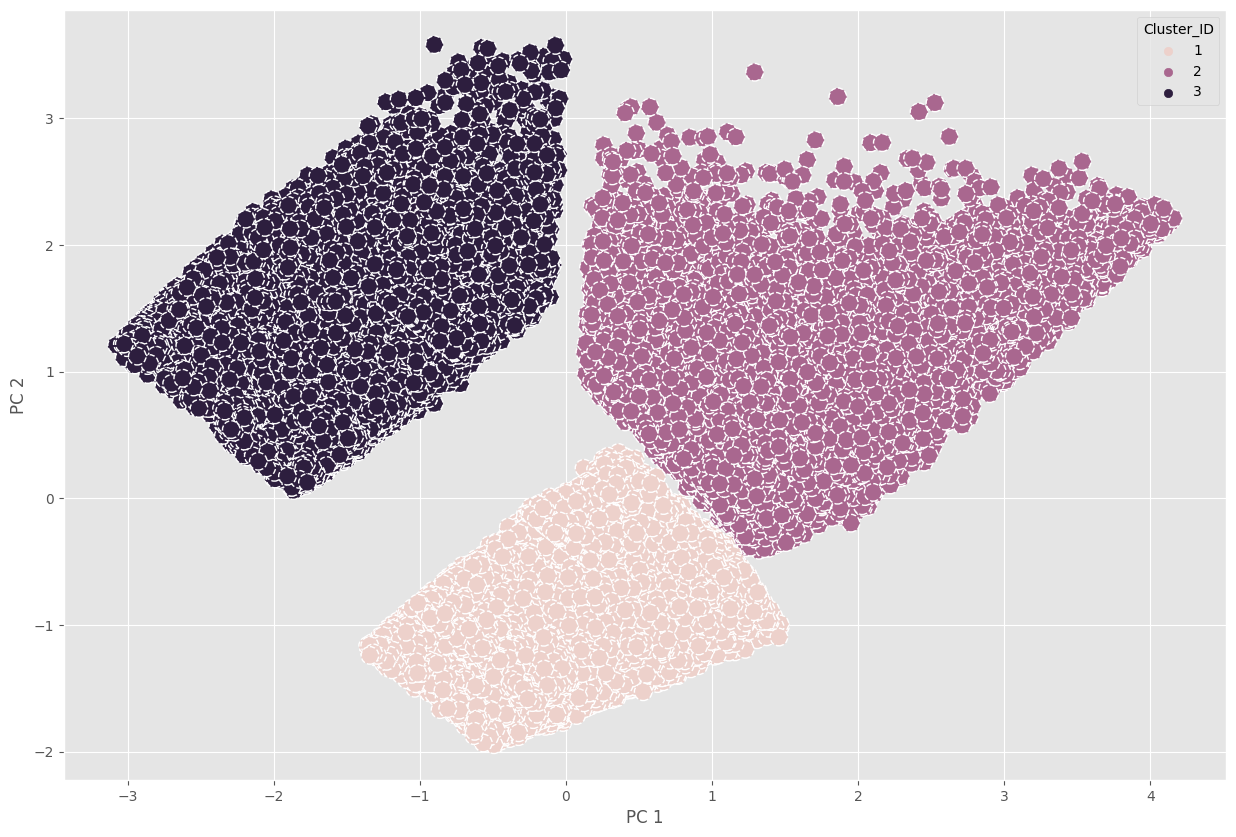

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='Cluster_ID',
    linestyle='--',
    data=df_pca,
    s=160,
    ax=ax
)

plt.show()

##Inter-Cluster Distance

In [ ]:
pip install yellowbrick

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


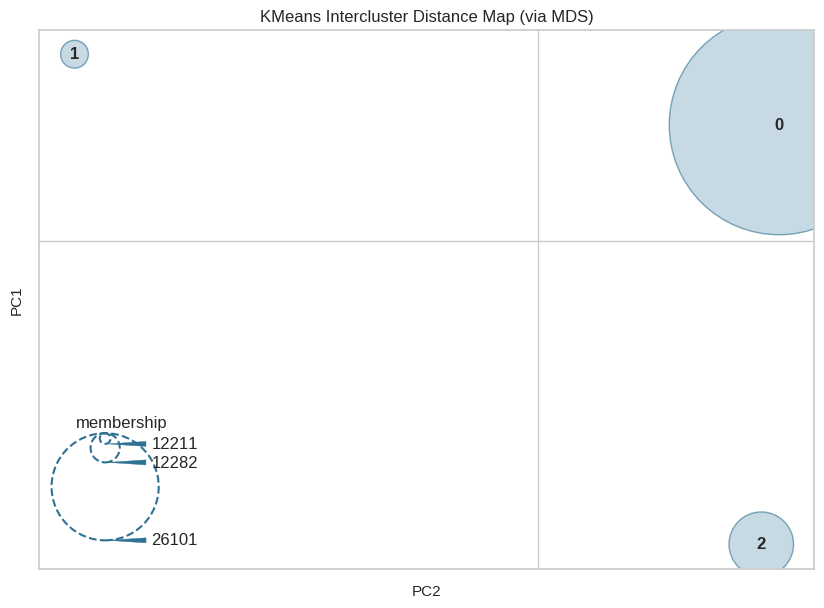

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [ ]:
from yellowbrick.cluster import InterclusterDistance
plt.rcParams['figure.figsize'] = (10, 7)

# Instantiate the clustering model and visualizer
model = kmeans
visualizer = InterclusterDistance(model)

visualizer.fit(rfm_std)  # Fit the data to the visualizer
visualizer.show()

It can be seen above that the distance between clusters is not too close.

#Cluster Analysis + Business Insights

Label cluster masing-masing member digabungkan kembali dengan data rfm.

In [ ]:
rfm['Cluster_ID'] = clusters

In [ ]:
rfm

,recency,frequency,monetary,Cluster_ID
MEMBER_NO,,,,
50931,23,18,7444.000000,2
5902,14,23,12331.000000,2
59483,6,13,11050.000000,2
15247,13,15,1050.000000,1
33829,17,13,8450.000000,2
...,...,...,...,...
57428,418,2,830.000000,3
60676,412,2,830.000000,3
11163,89,2,2322.721086,1


##Cluster Analysis

Berikut adalah visualisasi pie chart distribusi cluster.

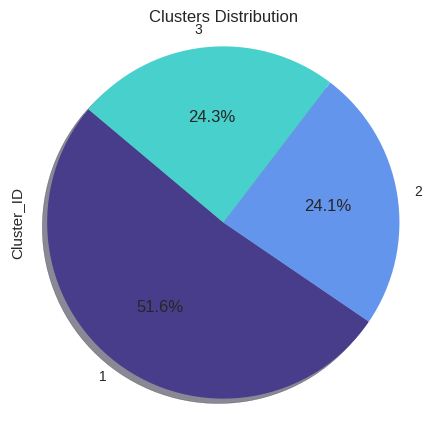

In [ ]:
ax = rfm.groupby('Cluster_ID')['Cluster_ID'].count().plot(
    kind='pie',
    figsize=(5, 5),
    colors = ['darkslateblue','cornflowerblue','mediumturquoise'],
    labels = ['1','2','3'],
    explode = (0,0,0) ,
    startangle=140,
    shadow=True,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.axis('equal')
plt.title('Clusters Distribution')
plt.show()

The majority of members are in cluster 1 with a proportion of 52%, while clusters 2 and 3 have a proportion of approximately 24%.

I will visualize the RFM distribution of each cluster to get information from each cluster.

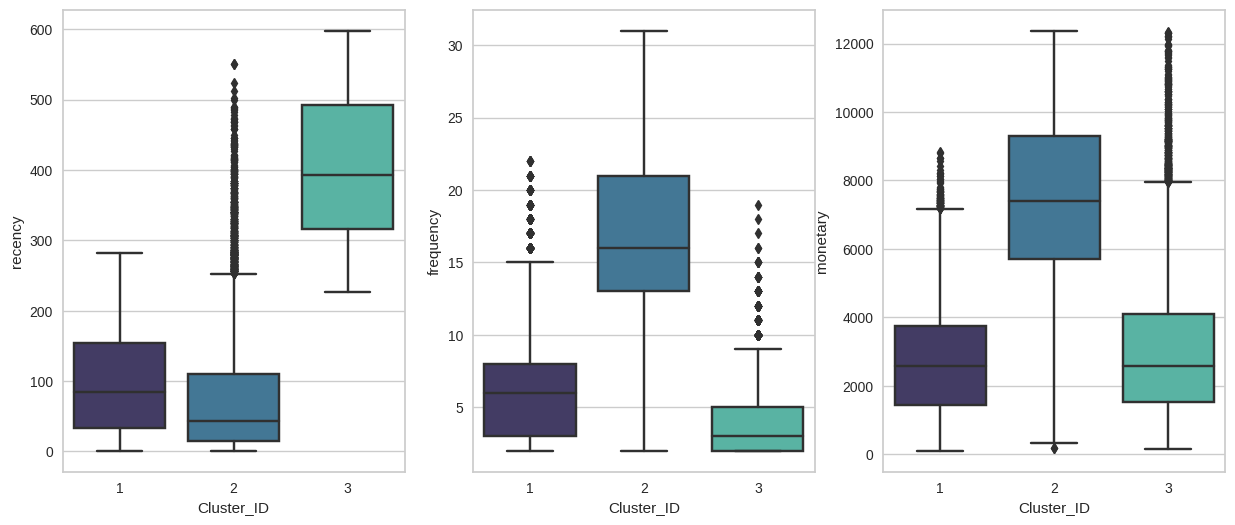

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1, 3, 1)
sns.boxplot(x=rfm['Cluster_ID'], y=rfm['recency'],palette='mako')

plt.subplot(1, 3, 2)
sns.boxplot(x=rfm['Cluster_ID'], y=rfm['frequency'],palette='mako')

plt.subplot(1, 3, 3)
sns.boxplot(x=rfm['Cluster_ID'], y=rfm['monetary'],palette='mako')
plt.show()

##Business Insights

From the boxplot graph above it can be seen the characteristics of each cluster as follows:

* The first cluster has a fairly good recency value but the frequency of flights and income generated from members in this cluster is still not too high. I would name this cluster "New Customers" after seeing their last flight was still quite recent while the frequency is very low.

* The second cluster has a very good recency value as well as the highest frequency of transactions and income generated compared to other clusters. Members in this cluster are already in the "Loyalist" customer category.

* The third cluster has the highest recency value or members in this cluster have not used this service for a long time. Members in this cluster also use flight services the least and generate the second lowest income.
The characteristics of a member like this are suitable to be called an "At Risk" customer.

In [ ]:
Clust_name = {1:'New Customers',2:'Loyalists',3:'At Risk'}
rfm['Cluster'] = rfm['Cluster_ID'].map(Clust_name)
rfm = rfm.reset_index()

In [ ]:
col = ['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
df_rfm = pd.merge(rfm, df[col], on='MEMBER_NO', how='left')

In [ ]:
df_rfm

,MEMBER_NO,recency,frequency,monetary,Cluster_ID,Cluster,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,50931,23,18,7444.000000,2,Loyalists,2012-12-20,2012-12-25,Female,6,VALINDA,CA,US,47.0,25.882353,136,2,0.982511,180183,2
1,5902,14,23,12331.000000,2,Loyalists,2012-09-08,2012-09-08,Female,4,nanning,guangxi,CA,48.0,25.318182,108,0,0.650620,78330,0
2,59483,6,13,11050.000000,2,Loyalists,2011-07-01,2011-07-01,Male,4,LOS ANGELES,CA,US,47.0,42.333333,96,0,0.632308,83156,0
3,15247,13,15,1050.000000,1,New Customers,2012-12-07,2013-02-23,Male,6,beijing,beijing,CN,40.0,27.857143,88,0,0.968167,132586,3
4,33829,17,13,8450.000000,2,Loyalists,2012-10-20,2012-10-21,Female,5,PARIS,guangdong,FR,43.0,42.583333,117,0,0.971737,106554,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50589,57428,418,2,830.000000,3,At Risk,2008-12-05,2008-12-05,Female,4,guangzhou,guangdong,CN,34.0,24.000000,24,0,0.750000,400,0
50590,60676,412,2,830.000000,3,At Risk,2012-07-12,2013-02-08,Male,4,RIYADH,guangdong,AA,37.0,6.000000,6,0,0.750000,400,0
50591,11163,89,2,2322.721086,1,New Customers,2005-05-08,2005-08-26,Male,4,guangzhou,guangdong,CN,34.0,70.000000,70,0,0.710000,900,1
50592,30765,121,2,2288.953164,1,New Customers,2008-11-16,2013-11-30,Male,4,TAIPEI,guangdong,TW,38.0,2.000000,2,0,0.670000,400,0


In [ ]:
numerical = df_rfm.loc[:, (df_rfm.dtypes == int) | (df_rfm.dtypes == float)].columns.tolist()
categorical = df_rfm.loc[:, df_rfm.dtypes == object].columns.tolist()
numerical.remove('MEMBER_NO')

In [ ]:
df_rfm[numerical].describe()

,recency,frequency,monetary,AGE,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000,50594.000000
mean,166.708681,8.356584,3955.130695,42.192968,78.429384,185.410009,0.160157,0.710887,8102.916769,2.221548
std,158.198248,6.469214,2766.901476,9.871355,81.415374,125.077036,0.643363,0.172616,9982.114465,6.435526
min,1.000000,2.000000,108.000000,6.000000,0.333333,1.000000,0.000000,0.112043,200.000000,0.000000
25%,36.000000,3.000000,1862.000000,35.000000,32.500000,100.000000,0.000000,0.602992,2738.000000,0.000000
50%,115.000000,6.000000,3234.454980,41.000000,54.000000,164.000000,0.000000,0.701900,5609.500000,0.000000
75%,254.000000,11.000000,5454.000000,48.000000,93.666667,250.000000,0.000000,0.800000,10732.750000,1.000000
max,598.000000,31.000000,12373.405392,92.000000,728.000000,728.000000,27.000000,1.500000,985572.000000,111.000000


In [ ]:
df_rfm[categorical].describe()

,Cluster,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,50594,50594,50594,50594,50594,50594
unique,3,2,3,2669,939,104
top,New Customers,Male,4,guangzhou,guangdong,CN
freq,26101,38279,49154,8747,16149,46665


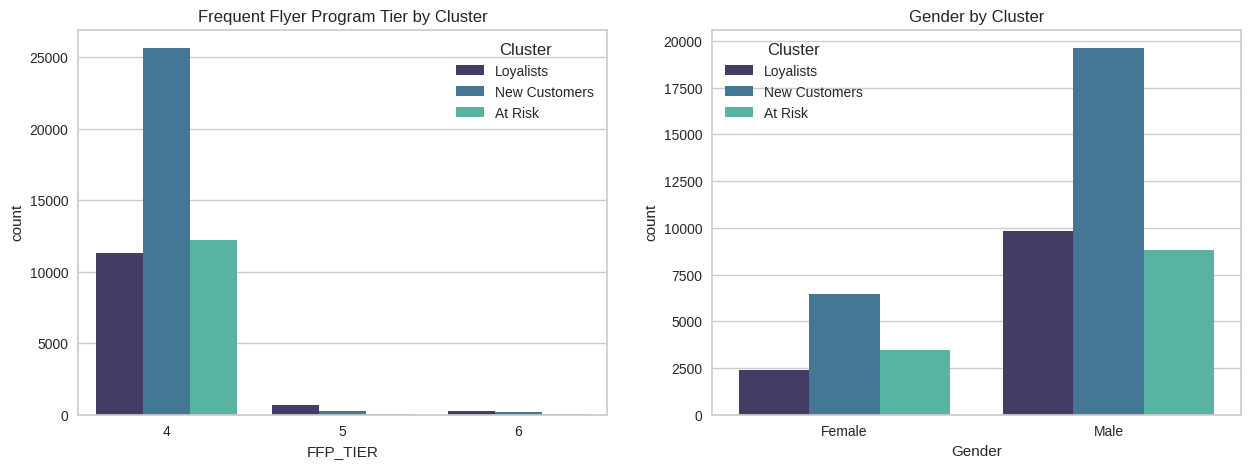

In [ ]:
# Plot the FFP_TIER Ups by Cluster
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='FFP_TIER', data=df_rfm,hue='Cluster', palette='mako',ax=ax1)
plt.xlabel('Frequent Flyer Program Tier')
ax1.title.set_text('Frequent Flyer Program Tier by Cluster')

# Plot the GENDER Ups by Cluster
sns.countplot(x='GENDER', data=df_rfm,hue='Cluster', palette='mako',ax=ax2)
plt.xlabel('Gender')
ax2.title.set_text('Gender by Cluster')

plt.show()

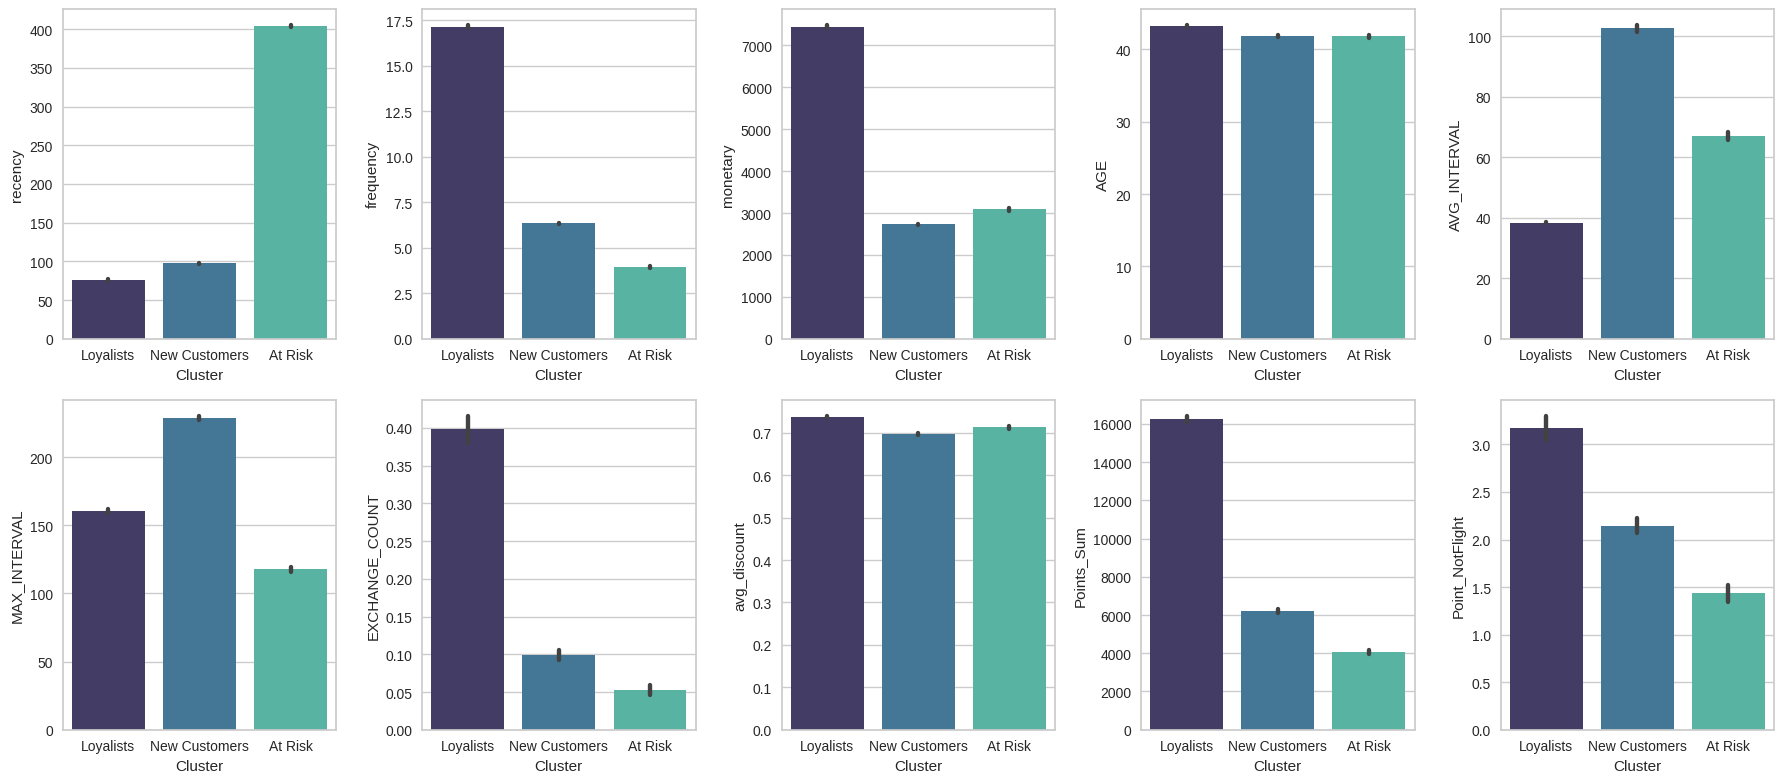

In [ ]:
# Univariate analysis for numerical columns
num_numerical_cols = len(numerical)
num_rows = (num_numerical_cols - 1) // 5 + 1
plt.figure(figsize=(18, 4*num_rows))
for i, col in enumerate(numerical):
    plt.subplot(num_rows, 5, i+1)
    sns.barplot(x='Cluster', y=col, data=df_rfm ,palette='mako')
    plt.xlabel('Cluster')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

From these graphs, we can tell:

* Based on the max_interval chart, new customers had longer flights compared to other clusters.
* New customers and At-risk customers rarely use their points which is in line with the total points left they have
* The average discount between clusters is quite the same
* At-risk customers are barely seen in frequent flyer program tiers 5 and 6.
* The age distribution between clusters is quite the same
